# A Notebook to run a query on SpaceTrack to fill orbital slots in a table

The problem to address here is to find tracks that fill the following table slots so that we can do a coverage analysis:

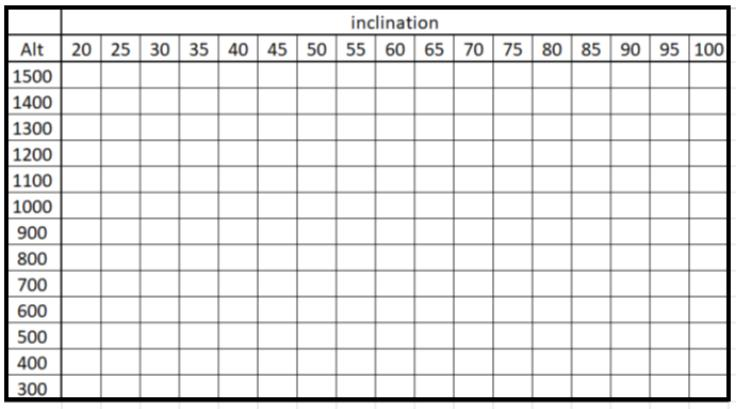

In [1]:
import urllib.request
import http.cookiejar
import time

In [2]:
def opener_spacetrack(username, password):
    cj = http.cookiejar.CookieJar()
    opener = urllib.request.build_opener(urllib.request.HTTPCookieProcessor(cj))
    auth_url = 'https://www.space-track.org/ajaxauth/login/'
    auth_data = urllib.parse.urlencode({'identity' : username, 'password' : password}).encode('utf-8')
    auth_req = urllib.request.Request(auth_url, auth_data)
    r = opener.open(auth_req)
    return opener

In [3]:
def get_tle(opener, alt, inc):
    url = f"https://www.space-track.org/basicspacedata/query/class/gp/APOAPSIS/{alt}--{alt + 100}/PERIAPSIS/{alt}--{alt + 100}/INCLINATION/{inc}--{inc + 5}/DECAY_DATE/null-val/EPOCH/%3Enow-30/limit/1/orderby/CREATION_DATE%20desc/format/tle"
    print(url)
    try:
        r = opener.open(url)
        tle_lines = r.read().decode('ascii').split('\r\n')
        if tle_lines[0] != '':
            with open('tableFiller.txt', 'a') as outFile:
                for i in range(0, 2):
                    outFile.write(tle_lines[i])
                    outFile.write("\n")
                    print(tle_lines[i])
            outFile.close()
        else:
            print(f"ERROR: No available track for altitude {alt} inclination {inc}")
            
    except:
        print("ERROR: exception thrown")
        
    print('')

In [4]:
username = 'YourSpaceTrackUsernameHere'
password = 'YourSpaceTrackPasswordHere'
opener = opener_spacetrack(username, password)

In [5]:
#fill table with RSO's.
for alt in range(300, 1600, 100):
    for inc in range(20, 105, 5):
        
        # This table has 221 slots so we have to be careful about throttling our Spacetrack API requests
        # Limit SpaceTrack API queries to less than 30 requests per minute
        # and also less than 300 requests per hour
        # With this 3 second delay the total request time would take about 11 minutes to complete
        time.sleep(3)
        
        print('altitude:', alt, 'inclination:', inc)
        get_tle(opener, alt, inc)

altitude: 300 inclination: 20
https://www.space-track.org/basicspacedata/query/class/gp/APOAPSIS/300--400/PERIAPSIS/300--400/INCLINATION/20--25/DECAY_DATE/null-val/EPOCH/%3Enow-30/limit/1/orderby/CREATION_DATE%20desc/format/tle
ERROR: No available track for altitude 300 inclination 20

altitude: 300 inclination: 25
https://www.space-track.org/basicspacedata/query/class/gp/APOAPSIS/300--400/PERIAPSIS/300--400/INCLINATION/25--30/DECAY_DATE/null-val/EPOCH/%3Enow-30/limit/1/orderby/CREATION_DATE%20desc/format/tle
ERROR: No available track for altitude 300 inclination 25

altitude: 300 inclination: 30
https://www.space-track.org/basicspacedata/query/class/gp/APOAPSIS/300--400/PERIAPSIS/300--400/INCLINATION/30--35/DECAY_DATE/null-val/EPOCH/%3Enow-30/limit/1/orderby/CREATION_DATE%20desc/format/tle
1 54044U 22133C   23166.07027153  .00121361  00000-0  15053-2 0  9991
2 54044  34.9905 164.2310 0004472 244.4924 115.5339 15.58654276 37457

altitude: 300 inclination: 35
https://www.space-track.org

1 25544U 98067A   23166.39186699  .00013044  00000-0  22976-3 0  9990
2 25544  51.6420 337.4223 0005417  81.7620 357.2264 15.50775554401519

altitude: 400 inclination: 55
https://www.space-track.org/basicspacedata/query/class/gp/APOAPSIS/400--500/PERIAPSIS/400--500/INCLINATION/55--60/DECAY_DATE/null-val/EPOCH/%3Enow-30/limit/1/orderby/CREATION_DATE%20desc/format/tle
1 51954U 22024A   23166.08896568  .00019759  00000-0  58744-3 0  9994
2 51954  58.2827  68.8994 0011373 179.7414 180.3659 15.34776719 70784

altitude: 400 inclination: 60
https://www.space-track.org/basicspacedata/query/class/gp/APOAPSIS/400--500/PERIAPSIS/400--500/INCLINATION/60--65/DECAY_DATE/null-val/EPOCH/%3Enow-30/limit/1/orderby/CREATION_DATE%20desc/format/tle
1 48872U 21058B   23166.14542630  .00063174  00000-0  11071-2 0  9991
2 48872  60.6874  46.8758 0024205  84.9489 275.4373 15.49827876109148

altitude: 400 inclination: 65
https://www.space-track.org/basicspacedata/query/class/gp/APOAPSIS/400--500/PERIAPSIS/400--

1 12904U 81103B   23166.15951206  .00003640  00000-0  22747-3 0  9994
2 12904  81.1749 292.3856 0023436  46.6497 313.6675 15.08997853822308

altitude: 500 inclination: 85
https://www.space-track.org/basicspacedata/query/class/gp/APOAPSIS/500--600/PERIAPSIS/500--600/INCLINATION/85--90/DECAY_DATE/null-val/EPOCH/%3Enow-30/limit/1/orderby/CREATION_DATE%20desc/format/tle
1 35742U 97051RV  23165.73334336  .00038124  00000-0  24539-2 0  9995
2 35742  86.3983  73.1735 0034469 224.6294 135.2167 15.07706128744907

altitude: 500 inclination: 90
https://www.space-track.org/basicspacedata/query/class/gp/APOAPSIS/500--600/PERIAPSIS/500--600/INCLINATION/90--95/DECAY_DATE/null-val/EPOCH/%3Enow-30/limit/1/orderby/CREATION_DATE%20desc/format/tle
1 27643U 03002B   23165.81087256  .00005130  00000-0  28314-3 0  9991
2 27643  94.0532 105.7070 0013050 328.9809  31.0658 15.14009494119422

altitude: 500 inclination: 95
https://www.space-track.org/basicspacedata/query/class/gp/APOAPSIS/500--600/PERIAPSIS/500--

ERROR: No available track for altitude 700 inclination 25

altitude: 700 inclination: 30
https://www.space-track.org/basicspacedata/query/class/gp/APOAPSIS/700--800/PERIAPSIS/700--800/INCLINATION/30--35/DECAY_DATE/null-val/EPOCH/%3Enow-30/limit/1/orderby/CREATION_DATE%20desc/format/tle
1  3597U 68110A   23166.09587481  .00000294  00000-0  86202-4 0  9997
2  3597  34.9939  75.8292 0005112 120.2483 239.8714 14.46204322874882

altitude: 700 inclination: 35
https://www.space-track.org/basicspacedata/query/class/gp/APOAPSIS/700--800/PERIAPSIS/700--800/INCLINATION/35--40/DECAY_DATE/null-val/EPOCH/%3Enow-30/limit/1/orderby/CREATION_DATE%20desc/format/tle
1  2142U 66031A   23166.23130496  .00000134  00000-0  54156-4 0  9994
2  2142  35.0438 209.6910 0007382 324.1699  35.8493 14.34065872993772

altitude: 700 inclination: 40
https://www.space-track.org/basicspacedata/query/class/gp/APOAPSIS/700--800/PERIAPSIS/700--800/INCLINATION/40--45/DECAY_DATE/null-val/EPOCH/%3Enow-30/limit/1/orderby/CREATIO

1 13512U 61015KV  23166.10876447  .00005027  00000-0  23567-2 0  9999
2 13512  65.4830 154.7664 0026768  81.6245 345.2921 14.20804366185136

altitude: 800 inclination: 70
https://www.space-track.org/basicspacedata/query/class/gp/APOAPSIS/800--900/PERIAPSIS/800--900/INCLINATION/70--75/DECAY_DATE/null-val/EPOCH/%3Enow-30/limit/1/orderby/CREATION_DATE%20desc/format/tle
1 25254U 93059H   23166.09284706  .00000427  00000-0  21445-3 0  9990
2 25254  70.9864 206.2724 0017432 223.6723 164.7983 14.22121857341648

altitude: 800 inclination: 75
https://www.space-track.org/basicspacedata/query/class/gp/APOAPSIS/800--900/PERIAPSIS/800--900/INCLINATION/75--80/DECAY_DATE/null-val/EPOCH/%3Enow-30/limit/1/orderby/CREATION_DATE%20desc/format/tle
1 54754U 22173A   23165.78319987  .00000210  00000-0  12107-3 0  9996
2 54754  77.6097  78.6428 0000802 178.3096 181.8064 14.09856424 25404

altitude: 800 inclination: 80
https://www.space-track.org/basicspacedata/query/class/gp/APOAPSIS/800--900/PERIAPSIS/800--

1  4755U 70025DD  23166.10777611  .00001354  00000-0  11221-2 0  9995
2  4755 100.1207 259.8495 0004195  39.2358 320.9101 13.90888711658129

altitude: 1000 inclination: 20
https://www.space-track.org/basicspacedata/query/class/gp/APOAPSIS/1000--1100/PERIAPSIS/1000--1100/INCLINATION/20--25/DECAY_DATE/null-val/EPOCH/%3Enow-30/limit/1/orderby/CREATION_DATE%20desc/format/tle
ERROR: No available track for altitude 1000 inclination 20

altitude: 1000 inclination: 25
https://www.space-track.org/basicspacedata/query/class/gp/APOAPSIS/1000--1100/PERIAPSIS/1000--1100/INCLINATION/25--30/DECAY_DATE/null-val/EPOCH/%3Enow-30/limit/1/orderby/CREATION_DATE%20desc/format/tle
ERROR: No available track for altitude 1000 inclination 25

altitude: 1000 inclination: 30
https://www.space-track.org/basicspacedata/query/class/gp/APOAPSIS/1000--1100/PERIAPSIS/1000--1100/INCLINATION/30--35/DECAY_DATE/null-val/EPOCH/%3Enow-30/limit/1/orderby/CREATION_DATE%20desc/format/tle
ERROR: No available track for altitude 1

ERROR: No available track for altitude 1100 inclination 60

altitude: 1100 inclination: 65
https://www.space-track.org/basicspacedata/query/class/gp/APOAPSIS/1100--1200/PERIAPSIS/1100--1200/INCLINATION/65--70/DECAY_DATE/null-val/EPOCH/%3Enow-30/limit/1/orderby/CREATION_DATE%20desc/format/tle
ERROR: No available track for altitude 1100 inclination 65

altitude: 1100 inclination: 70
https://www.space-track.org/basicspacedata/query/class/gp/APOAPSIS/1100--1200/PERIAPSIS/1100--1200/INCLINATION/70--75/DECAY_DATE/null-val/EPOCH/%3Enow-30/limit/1/orderby/CREATION_DATE%20desc/format/tle
1  6289U 69024C   23166.11255729  .00000322  00000-0  76352-3 0  9999
2  6289  73.9861 184.3400 0008495 200.1173 217.1668 13.27309428620144

altitude: 1100 inclination: 75
https://www.space-track.org/basicspacedata/query/class/gp/APOAPSIS/1100--1200/PERIAPSIS/1100--1200/INCLINATION/75--80/DECAY_DATE/null-val/EPOCH/%3Enow-30/limit/1/orderby/CREATION_DATE%20desc/format/tle
ERROR: No available track for altitude 1

altitude: 1300 inclination: 20
https://www.space-track.org/basicspacedata/query/class/gp/APOAPSIS/1300--1400/PERIAPSIS/1300--1400/INCLINATION/20--25/DECAY_DATE/null-val/EPOCH/%3Enow-30/limit/1/orderby/CREATION_DATE%20desc/format/tle
ERROR: No available track for altitude 1300 inclination 20

altitude: 1300 inclination: 25
https://www.space-track.org/basicspacedata/query/class/gp/APOAPSIS/1300--1400/PERIAPSIS/1300--1400/INCLINATION/25--30/DECAY_DATE/null-val/EPOCH/%3Enow-30/limit/1/orderby/CREATION_DATE%20desc/format/tle
ERROR: No available track for altitude 1300 inclination 25

altitude: 1300 inclination: 30
https://www.space-track.org/basicspacedata/query/class/gp/APOAPSIS/1300--1400/PERIAPSIS/1300--1400/INCLINATION/30--35/DECAY_DATE/null-val/EPOCH/%3Enow-30/limit/1/orderby/CREATION_DATE%20desc/format/tle
ERROR: No available track for altitude 1300 inclination 30

altitude: 1300 inclination: 35
https://www.space-track.org/basicspacedata/query/class/gp/APOAPSIS/1300--1400/PERIAPSIS/13

ERROR: No available track for altitude 1400 inclination 60

altitude: 1400 inclination: 65
https://www.space-track.org/basicspacedata/query/class/gp/APOAPSIS/1400--1500/PERIAPSIS/1400--1500/INCLINATION/65--70/DECAY_DATE/null-val/EPOCH/%3Enow-30/limit/1/orderby/CREATION_DATE%20desc/format/tle
1 38077U 12006A   23165.83488746 -.00000027  00000-0  68864-4 0  9995
2 38077  69.4926   8.3260 0009369 342.9163  17.1547 12.54931187519266

altitude: 1400 inclination: 70
https://www.space-track.org/basicspacedata/query/class/gp/APOAPSIS/1400--1500/PERIAPSIS/1400--1500/INCLINATION/70--75/DECAY_DATE/null-val/EPOCH/%3Enow-30/limit/1/orderby/CREATION_DATE%20desc/format/tle
1 10581U 78005A   23166.13212796 -.00000026  00000-0 -66153-4 0  9999
2 10581  74.0313 297.4710 0005692 287.3969 245.7733 12.51269673 75118

altitude: 1400 inclination: 75
https://www.space-track.org/basicspacedata/query/class/gp/APOAPSIS/1400--1500/PERIAPSIS/1400--1500/INCLINATION/75--80/DECAY_DATE/null-val/EPOCH/%3Enow-30/limit/1